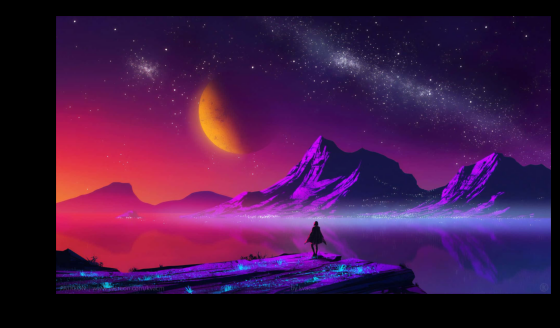

In [183]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.facecolor'] = 'black'

img = plt.imread('../../data/other_image.jpg')
plt.imshow(img)

In [184]:
print(img[0][0])

[33 17 62]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


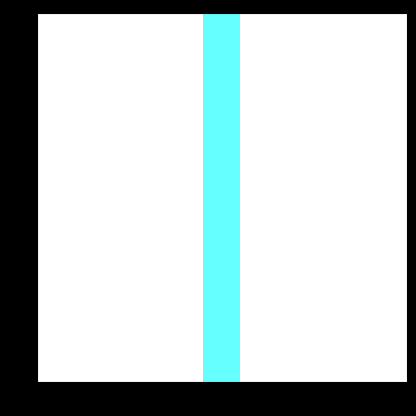

In [185]:
test_img = np.ones((100, 100, 3)) * 100

test_img[:, 45:55, 0] = 0.4

plt.imshow(test_img)

In [186]:
print(img[:,:, 0])

[[33 33 33 ... 20 20 20]
 [34 34 34 ... 20 20 20]
 [34 34 34 ... 20 20 20]
 ...
 [49 50 49 ... 42 41 41]
 [58 58 59 ... 44 43 43]
 [69 71 70 ... 44 43 43]]


In [187]:
vals = np.array(img[:,:, 0])
print(vals)

[[33 33 33 ... 20 20 20]
 [34 34 34 ... 20 20 20]
 [34 34 34 ... 20 20 20]
 ...
 [49 50 49 ... 42 41 41]
 [58 58 59 ... 44 43 43]
 [69 71 70 ... 44 43 43]]


In [188]:
AtA = np.dot(vals.T, vals)

print(AtA)

[[148  60 219 ...  69 210 231]
 [ 60 251 143 ...  66   4 128]
 [219 143 255 ...  63  83   9]
 ...
 [ 69  66  63 ... 127  43   1]
 [210   4  83 ...  43 253 124]
 [231 128   9 ...   1 124  23]]


In [189]:
eigAtA = np.linalg.eig(AtA)

print(eigAtA)

(array([ 2.44871114e+05,  6.46144989e+03,  6.40478594e+03, ...,
       -1.53885574e+01,  8.69792724e+01, -4.21613499e+02]), array([[ 0.0231092 ,  0.00420826, -0.01444798, ..., -0.00149606,
        -0.00105411, -0.00020062],
       [ 0.02258525, -0.01193234, -0.00467304, ..., -0.03605487,
         0.03006207, -0.01653577],
       [ 0.02268535,  0.03957663,  0.01303549, ...,  0.03300596,
         0.01199343,  0.01403366],
       ...,
       [ 0.02272041,  0.01579134,  0.00216706, ...,  0.0130451 ,
        -0.00695446,  0.01316453],
       [ 0.02300952, -0.01111988, -0.01353632, ..., -0.02980177,
         0.00343512, -0.01956887],
       [ 0.02279862, -0.00982212, -0.00617138, ...,  0.01181398,
         0.02890418, -0.01726528]]))


In [190]:
eigValsAtA = eigAtA[0]
diagLambda = np.diag(eigValsAtA)
eigVectorsAtA = eigAtA[1]

In [191]:
#np.isclose(AtA, eigVectorsAtA @ diagLambda @ eigVectorsAtA.T)

In [192]:
Q = V = eigVectorsAtA

In [193]:
U = np.zeros((1080, 1920))

for i in range(0, 1080):
    val = (1/  np.sqrt(  np.abs(eigValsAtA[i])   )) * np.dot( vals, V[i])
    U[:,i] = val

    if(val[0] < 0):
        print(val)


[-0.06891997 -0.0543512  -0.0706202  ... -0.37279182 -0.36206577
 -0.26410552]
[-0.03525684 -0.02251291  0.02135169 ... -0.02690867  0.02248674
  0.09127672]
[-0.09581451 -0.1410459  -0.12288997 ... -0.35428248 -0.39137953
 -0.4974756 ]
[-0.40529602 -0.41690998 -0.48117205 ... -0.34226914 -0.44260781
 -0.6735799 ]
[-0.1390032  -0.10346924 -0.08602901 ... -0.15281368 -0.14591984
 -0.11085646]
[-0.01441725 -0.03603205 -0.0005688  ...  0.08530867  0.1100051
  0.0060055 ]
[-0.21242569 -0.2258219  -0.25054316 ... -0.65294504 -0.61983862
 -0.54229473]
[-0.07220837 -0.0524129  -0.05374692 ... -0.23760419 -0.31733896
 -0.36676347]
[-0.18357424 -0.28278609 -0.17941572 ... -0.04537108 -0.05499075
 -0.13735715]
[-0.19226948 -0.16288027 -0.19288574 ... -0.39136044 -0.35222906
 -0.3068978 ]
[-0.45813547 -0.44476693 -0.45271349 ... -0.55567334 -0.6114786
 -0.69023815]
[-0.32433437 -0.31113535 -0.34205706 ... -0.21998939 -0.33820273
 -0.5472129 ]
[-0.31405428 -0.32826549 -0.2856299  ... -0.38744607 -

In [194]:
abs_eig = np.abs(eigValsAtA)

abs_lambda_sqrt = np.sqrt(abs_eig)

abs_diag = np.diag(abs_lambda_sqrt)

result = np.dot(U, np.dot( abs_diag , V ))

In [195]:
print(result.shape)

(1080, 1920)


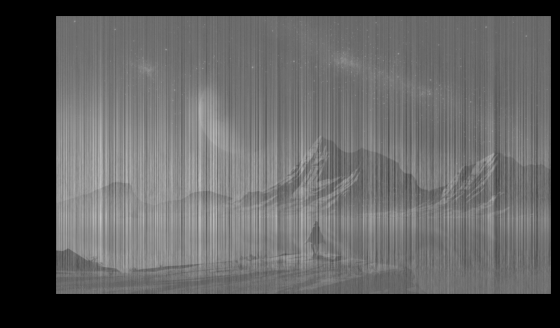

In [196]:
plt.imshow(result, cmap='gray')

plt.imsave("./result.jpeg", result)

In [197]:
abs_eig_sort = np.sort(abs_eig)

abs_lambda_sqrt_sort = np.sqrt(abs_eig_sort)

abs_diag_sort = np.diag(abs_lambda_sqrt_sort)

In [198]:
result = np.dot(U, np.dot( abs_diag_sort , V ))

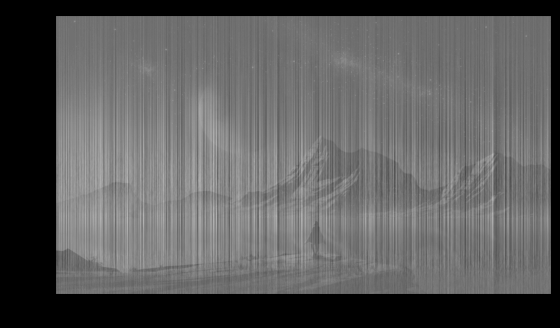

In [199]:
plt.imshow(result, cmap='gray')

In [200]:
print(abs_eig_sort.shape)

(1920,)


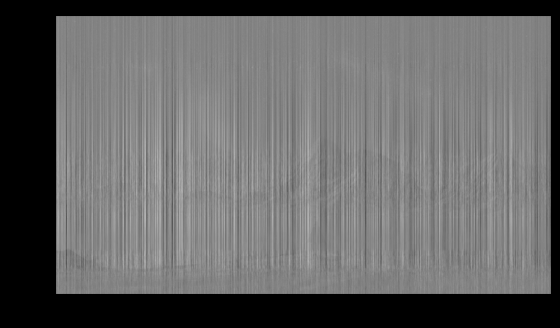

In [201]:
abs_eig_5 = np.zeros(1920)
abs_eig_10 = np.zeros(1920)
abs_eig_25 = np.zeros(1920)
abs_eig_50 = np.zeros(1920)
abs_eig_100 = np.zeros(1920)

abs_eig_5[0:5] = abs_eig_sort[0:5]
abs_eig_10[0:10] = abs_eig_sort[0:10]
abs_eig_5[0:25] = abs_eig_sort[0:25]
abs_eig_5[0:50] = abs_eig_sort[0:50]
abs_eig_5[0:100] = abs_eig_sort[0:100]


abs_lambda_sqrt_sort_5 = np.sqrt(abs_eig_5)
abs_lambda_sqrt_sort_10 = np.sqrt(abs_eig_10)
abs_lambda_sqrt_sort_25 = np.sqrt(abs_eig_25)
abs_lambda_sqrt_sort_50 = np.sqrt(abs_eig_50)
abs_lambda_sqrt_sort_100 = np.sqrt(abs_eig_100)

abs_diag_5 = np.diag(abs_lambda_sqrt_sort_5)
abs_diag_10 = np.diag(abs_lambda_sqrt_sort_10)
abs_diag_25 = np.diag(abs_lambda_sqrt_sort_25)
abs_diag_50 = np.diag(abs_lambda_sqrt_sort_50)
abs_diag_100 = np.diag(abs_lambda_sqrt_sort_100)


result_5 = np.dot(U, np.dot( abs_diag_5 , V ))
result_10 = np.dot(U, np.dot( abs_diag_5 , V ))
result_25 = np.dot(U, np.dot( abs_diag_5 , V ))
result_50 = np.dot(U, np.dot( abs_diag_5 , V ))
result_100 = np.dot(U, np.dot( abs_diag_5 , V ))

plt.imshow(result_5, cmap='gray')


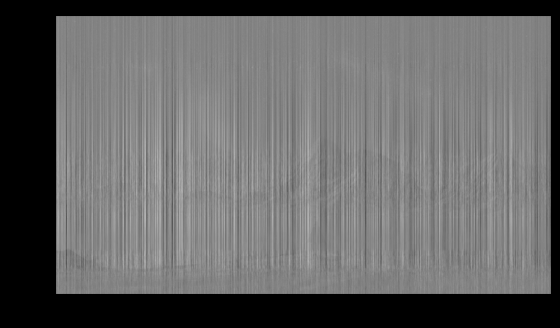

In [202]:
plt.imshow(result_10, cmap='gray')


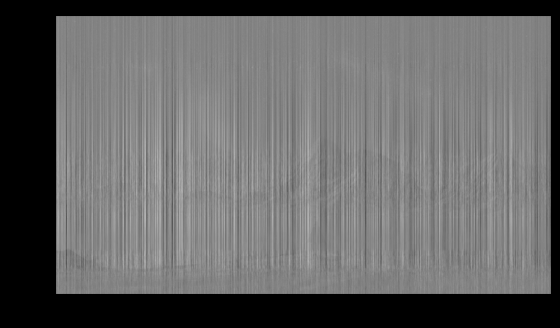

In [203]:
plt.imshow(result_25, cmap='gray')


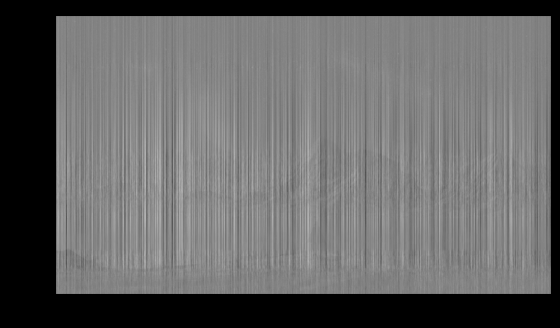

In [204]:
plt.imshow(result_50, cmap='gray')

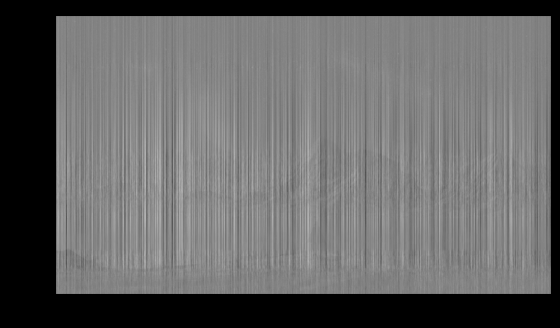

In [205]:
plt.imshow(result_100, cmap='gray')

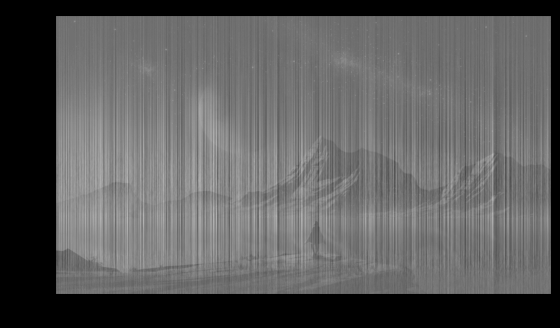

In [206]:
plt.imshow(result, cmap='gray')